## **Sentiment Analysis**

## Importing Libraries

In [58]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import kagglehub
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import joblib
import warnings
warnings.filterwarnings('ignore')

## Importing Data 1

In [59]:
path = kagglehub.dataset_download("abhi8923shriv/sentiment-analysis-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Maddox\.cache\kagglehub\datasets\abhi8923shriv\sentiment-analysis-dataset\versions\9


In [60]:
import os
files = os.listdir(path)
files

['test.csv',
 'testdata.manual.2009.06.14.csv',
 'train.csv',
 'training.1600000.processed.noemoticon.csv']

In [61]:
path1=path+'/'+files[0]
path2=path+'/'+files[1]
path3=path+'/'+files[2]
path4=path+'/'+files[3]
display(path1)

'C:\\Users\\Maddox\\.cache\\kagglehub\\datasets\\abhi8923shriv\\sentiment-analysis-dataset\\versions\\9/test.csv'

In [62]:
import pandas as pd
df1 = pd.read_csv(path1, encoding="iso-8859-1")

In [63]:
display(df1.sample(5))
display(df1.shape)
display(df1.columns)
display(df1.info())


,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
633,dfd9f1800b,"man, I am really sorry",negative,morning,46-60,Dominica,71986.0,750.0,96.0
2065,8b3811c819,"fine, ill get myself some miso soup down the s...",neutral,noon,60-70,Guinea-Bissau,1968001.0,28120.0,70.0
2662,1f163ffa8a,_graham yerrrr sameee haha its the way he play...,positive,noon,21-30,Malaysia,32365999.0,328550.0,99.0
1332,31f2861133,Squabbling with people over the internet is gr...,neutral,morning,0-20,Ukraine,43733762.0,579320.0,75.0
396,64b297c15e,says my new layout is so cute x) see the cutie...,positive,morning,0-20,Argentina,45195774.0,2736690.0,17.0


(4815, 9)

Index(['textID', 'text', 'sentiment', 'Time of Tweet', 'Age of User',
       'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            3534 non-null   object 
 1   text              3534 non-null   object 
 2   sentiment         3534 non-null   object 
 3   Time of Tweet     3534 non-null   object 
 4   Age of User       3534 non-null   object 
 5   Country           3534 non-null   object 
 6   Population -2020  3534 non-null   float64
 7   Land Area (Km²)   3534 non-null   float64
 8   Density (P/Km²)   3534 non-null   float64
dtypes: float64(3), object(6)
memory usage: 338.7+ KB


None

In [64]:
df2 = pd.read_csv(path2, encoding='utf-8')
display(df2.sample(2))
display(df2.shape)
display(df2.info())

,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,"@stellargirl I loooooooovvvvvveee my Kindle2. Not that the DX is cool, but the 2 is fantastic in its own right."
21,4,25,Mon May 11 05:22:37 UTC 2009,lebron,emceet,@wordwhizkid Lebron is a beast... nobody in th...
98,0,222,Mon May 25 17:32:11 UTC 2009,exam,filmcriticbeta,"It's a bank holiday, yet I'm only out of work ..."


(515, 6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 6 columns):
 #   Column                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                           --------------  ----- 
 0   4                                                                                                                515 non-null    int64 
 1   3                                                                                                                515 non-null    int64 
 2   Mon May 11 03:17:40 UTC 2009                                                                                     515 non-null    object
 3   kindle2                                                                                                          515 non-null    object
 4   tpryan                                       

None

In [65]:
df3 = pd.read_csv(path3, encoding="iso-8859-1")
display(df3.sample(5))
display(df3.shape)
display(df3.columns)
display(df3.info())

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
9424,72703c7906,"It`s those little things you do, that make me ...",love you.,positive,noon,60-70,Slovakia,5459642,48088.0,114
8448,58030178a2,"she was wonderful, did not get to meet her th...","she was wonderful, did not get to meet her though",neutral,morning,0-20,Kazakhstan,18776707,2699700.0,7
25222,ab0c9b04d6,My day was good! Spent the day catching up ...,My day was good! Spent the day catching up on...,neutral,noon,60-70,Bangladesh,164689383,130170.0,1265
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26
3788,dcd74022d7,It`s Star Wars day?! Urgh I`m gonna have to g...,Urgh,negative,night,31-45,Burkina Faso,20903273,273600.0,76


(27481, 10)

Index(['textID', 'text', 'selected_text', 'sentiment', 'Time of Tweet',
       'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)',
       'Density (P/Km²)'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB


None

In [66]:
df4 = pd.read_csv(path4, encoding="iso-8859-1")
display(df4.sample(5))
display(df4.shape)
display(df4.columns)
display(df4.info())

,polarity of tweet,id of the tweet,date of the tweet,query,user,text of the tweet
621481,0,2228828956,Thu Jun 18 14:56:22 PDT 2009,NO_QUERY,jessoteric,@NickMcLaren no missed out... I did go to Ham...
500282,0,2186798381,Mon Jun 15 19:21:09 PDT 2009,NO_QUERY,EILANDLOVE,Watching why did I get married an drinking rum...
504697,0,2188198352,Mon Jun 15 21:28:13 PDT 2009,NO_QUERY,VictoriaBlacc,@Shay_Marie ah man shaina
437349,0,2065899031,Sun Jun 07 09:30:28 PDT 2009,NO_QUERY,hollyknowsbest,wish i was at summertime ball right now so je...
18284,0,1556557980,Sat Apr 18 23:19:19 PDT 2009,NO_QUERY,beauty_chanel,I have a badd headache


(1048572, 6)

Index(['polarity of tweet ', 'id of the tweet', 'date of the tweet', 'query',
       'user', 'text of the tweet '],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048572 entries, 0 to 1048571
Data columns (total 6 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   polarity of tweet   1048572 non-null  int64 
 1   id of the tweet     1048572 non-null  int64 
 2   date of the tweet   1048572 non-null  object
 3   query               1048572 non-null  object
 4   user                1048572 non-null  object
 5   text of the tweet   1048572 non-null  object
dtypes: int64(2), object(4)
memory usage: 48.0+ MB


None

## Importing Data 2 , 0-negative, 4=positive

In [67]:
path5 = kagglehub.dataset_download("kazanova/sentiment140")

print("Path to dataset files:", path5)

Path to dataset files: C:\Users\Maddox\.cache\kagglehub\datasets\kazanova\sentiment140\versions\2


In [68]:
fullpath=path5+'/'+os.listdir(path5)[0]
fullpath
df5 = pd.read_csv(fullpath, encoding="iso-8859-1")
display(df5.sample(5))
display(df5.shape)
display(df5.columns)
display(df5.info())

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
609831,0,2223898517,Thu Jun 18 08:50:47 PDT 2009,NO_QUERY,20bmg08,@britneyspears im so bummed i'm gunna cry. I t...
1339631,4,2018731377,Wed Jun 03 10:25:26 PDT 2009,NO_QUERY,Rachael_Lopez,has just seen the new moon trailor....innntere...
111572,0,1825171328,Sun May 17 04:39:14 PDT 2009,NO_QUERY,xo_mcflyandjb,none of the people im following are tweeting lol
181522,0,1966907254,Fri May 29 18:37:04 PDT 2009,NO_QUERY,leahsasing,Saturday morning chores lots of cleaning to d...
1520590,4,2176220202,Mon Jun 15 03:15:38 PDT 2009,NO_QUERY,xbllygbsnii,ohh alright then ;) :$ oh alright well ask wh...


(1599999, 6)

Index(['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY',
       '_TheSpecialOne_',
       '@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count    Dtype 
---  ------                                                                                                               --------------    ----- 
 0   0                                                                                                                    1599999 non-null  int64 
 1   1467810369                                                                                                           1599999 non-null  int64 
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         1599999 non-null  object
 3   NO_QUERY                                                                                                             1599999 non-null  object
 4   _

None

In [69]:
#renaming columns
cols=['target','id','date', 'flag', 'user','text']
df5 = pd.read_csv(fullpath, names=cols, encoding="iso-8859-1")
df_data=df5
display(df_data.sample())

,target,id,date,flag,user,text
459453,0,2072182733,Sun Jun 07 20:32:52 PDT 2009,NO_QUERY,rubirdy,Maybe? You can trust me!


In [70]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Maddox\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [71]:
#we can remove these words
print(stopwords.words('english')) #These words will not add any context to understand(for ML model)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

## EDA

In [72]:
df_data.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

<Axes: >

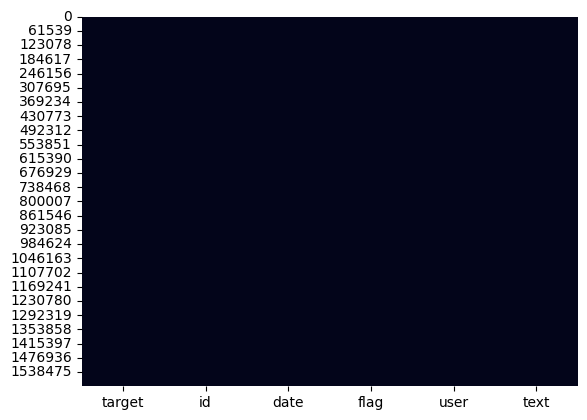

In [73]:
#visualize missing values for all columns
sns.heatmap(df_data.isna(), cbar=False)

In [74]:
df_data.duplicated().sum()

np.int64(0)

In [75]:
print("number of unique values in the dataset:")
for i in cols:
    print(f'{i} : {df_data[i].value_counts().count()}')
display(df_data['target'].value_counts())
display(df_data['flag'].value_counts())

number of unique values in the dataset:
target : 2
id : 1598315
date : 774363
flag : 1
user : 659775
text : 1581466


target
0    800000
4    800000
Name: count, dtype: int64

flag
NO_QUERY    1600000
Name: count, dtype: int64

lets just change the label from 4 -> 1

In [76]:
df_data['target']=df_data['target'].replace(4,1)

In [77]:
df_data['target'].value_counts()

target
0    800000
1    800000
Name: count, dtype: int64

removing flag,user,id column because there in nothing in there which is relevent to outr project

In [78]:
df_data=df_data.drop('flag', axis=1)

In [79]:
display(df_data.sample())
df_data.columns

,target,id,date,user,text
747492,0,2283673786,Mon Jun 22 12:55:42 PDT 2009,SheezyBreezy,"@AizforASHLEY you aint neva lied, it's like 10..."


Index(['target', 'id', 'date', 'user', 'text'], dtype='object')

## Stemming
just removing stopwords, keep the keywords for classification

In [80]:
port_stem=PorterStemmer()

In [81]:
def stemming(input):
    stemmed_input=re.sub('[^a-zA-Z]', ' ', input) #Regular Expression function already imported above
    stemmed_input=stemmed_input.lower() #Standardizing the input
    stemmed_input=stemmed_input.split()
    stemmed_input=[port_stem.stem(word) for word in stemmed_input if not word in stopwords.words('english')]
    stemmed_input=' '.join(stemmed_input)

    return stemmed_input

In [82]:
# df_data['stemmed_content']=df_data['text'].apply(stemming)

In [83]:
# df_data.to_csv("Stemmed_Data_Sentiment.csv", index=False)

In [84]:
df_data=pd.read_csv(r'D:\Data Science\Minor-Project\Stemmed_Data_Sentiment.csv')

In [85]:
df_data.sample(2)

,target,id,date,user,text,stemmed_content
221191,0,1976781179,Sat May 30 19:03:08 PDT 2009,maryag,I had a good link to one where a guy tried to ...,good link one guy tri grope girl train turn ar...
305458,0,2000000289,Mon Jun 01 21:12:59 PDT 2009,BeantownCutie,I think @jonathanrknight just broke my heart,think jonathanrknight broke heart


In [86]:
df_data.isna().sum()

target               0
id                   0
date                 0
user                 0
text                 0
stemmed_content    495
dtype: int64

In [87]:
df_data=df_data.dropna()

In [88]:
display(df_data.isna().sum())
df_data.info()

target             0
id                 0
date               0
user               0
text               0
stemmed_content    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Index: 1599505 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   target           1599505 non-null  int64 
 1   id               1599505 non-null  int64 
 2   date             1599505 non-null  object
 3   user             1599505 non-null  object
 4   text             1599505 non-null  object
 5   stemmed_content  1599505 non-null  object
dtypes: int64(2), object(4)
memory usage: 85.4+ MB


Let's just keep the columns we need to train our model

In [89]:
X=df_data['stemmed_content']
y=df_data['target']
print(y)
print(X)

0          0
1          0
2          0
3          0
4          0
          ..
1599995    1
1599996    1
1599997    1
1599998    1
1599999    1
Name: target, Length: 1599505, dtype: int64
0          switchfoot http twitpic com zl awww bummer sho...
1          upset updat facebook text might cri result sch...
2          kenichan dive mani time ball manag save rest g...
3                            whole bodi feel itchi like fire
4                              nationwideclass behav mad see
                                 ...                        
1599995                           woke school best feel ever
1599996    thewdb com cool hear old walt interview http b...
1599997                         readi mojo makeov ask detail
1599998    happi th birthday boo alll time tupac amaru sh...
1599999    happi charitytuesday thenspcc sparkschar speak...
Name: stemmed_content, Length: 1599505, dtype: object


In [90]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.15, stratify=y,random_state=40)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1359579,) (239926,)
(1359579,) (239926,)


### Feature Extraction (Vectorizer): 
Converting text data into numerical data

In [91]:
vectorizer=TfidfVectorizer()

X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

In [92]:
# print(X_train)
# print(X_test)

## **Training Model**

### Logistic Regression

In [93]:
lr=LogisticRegression()
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [94]:
lr_pred=lr.predict(X_test)
lr_accuracy=accuracy_score(y_test,lr_pred)
print(f'Logistic Regression Accuracy Score: {lr_accuracy}')

Logistic Regression Accuracy Score: 0.7786775922576128


In [ ]:
lr_pipeline=Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', LogisticRegression())
])
lr_cv_scores=cross_val_score(lr_pipeline, X, y, cv=5)

print(f"Cross-validation accuracy scores: {lr_cv_scores}")
print(f"Average cross-validation accuracy: {lr_cv_scores.mean():.4f}")

### Linear SVC

In [ ]:
svc=LinearSVC()
svc.fit(X_train, y_train)

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


In [ ]:
svc_pred=svc.predict(X_test)
svc_accuracy=accuracy_score(y_test,svc_pred)
print(f'SVC Accuracy Score: {svc_accuracy}')

SVC Accuracy Score: 0.7711252636229504


In [ ]:
svc_pipeline=Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', LinearSVC())
])
svc_cv_scores=cross_val_score(svc_pipeline, X, y, cv=5)

print(f"Cross-validation accuracy scores: {svc_cv_scores}")
print(f"Average cross-validation accuracy: {svc_cv_scores.mean():.4f}")

Cross-validation accuracy scores: [0.76097918 0.75487416 0.75191075 0.76329552 0.75792823]
Average cross-validation accuracy: 0.7578


### MultinomialNB

In [ ]:
mnb=MultinomialNB()
mnb.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [ ]:
mnb_pred=mnb.predict(X_test)
mnb_accuracy=accuracy_score(y_test,mnb_pred)
print(f'HGBC Accuracy Score: {mnb_accuracy}')

HGBC Accuracy Score: 0.7556288188858231


In [ ]:
mnb_pipeline=Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', MultinomialNB())
])
mnb_cv_scores=cross_val_score(mnb_pipeline, X, y, cv=5)

print(f"Cross-validation accuracy scores: {mnb_cv_scores}")
print(f"Average cross-validation accuracy: {mnb_cv_scores.mean():.4f}")

Cross-validation accuracy scores: [0.74724993 0.7384347  0.73652474 0.74967255 0.74169196]
Average cross-validation accuracy: 0.7427


### **Exporting all the models**

In [ ]:
lr_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', LogisticRegression(random_state=42))
])

svc_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', LinearSVC(random_state=42, dual=True))
])

mnb_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', MultinomialNB())
])

pipelines = {
    'lr': lr_pipeline,
    'svc': svc_pipeline,
    'mnb': mnb_pipeline
}

print("\nStarting model export process...")

for model_name, pipeline in pipelines.items():
    
    pipeline.fit(X, y)

    filename = f'{model_name}_sentiment_pipeline.joblib'

    joblib.dump(pipeline, filename)
    print(f"Pipeline '{model_name}' successfully exported to '{filename}'")

print("\nModel export process complete.")




Starting model export process...
Pipeline 'lr' successfully exported to 'lr_sentiment_pipeline.joblib'
Pipeline 'svc' successfully exported to 'svc_sentiment_pipeline.joblib'
Pipeline 'hgbc' successfully exported to 'hgbc_sentiment_pipeline.joblib'

Model export process complete.


### Accuracy Check

In [ ]:
all_model_score=[lr_accuracy,svc_accuracy,mnb_accuracy]
model_name=['Logistic Regression','SVC','MultinomialNB']
for i in range(len(all_model_score)):
    print(f'{i} : {all_model_score[i]}')

0 : 0.7786775922576128
1 : 0.7711252636229504
2 : 0.7556288188858231


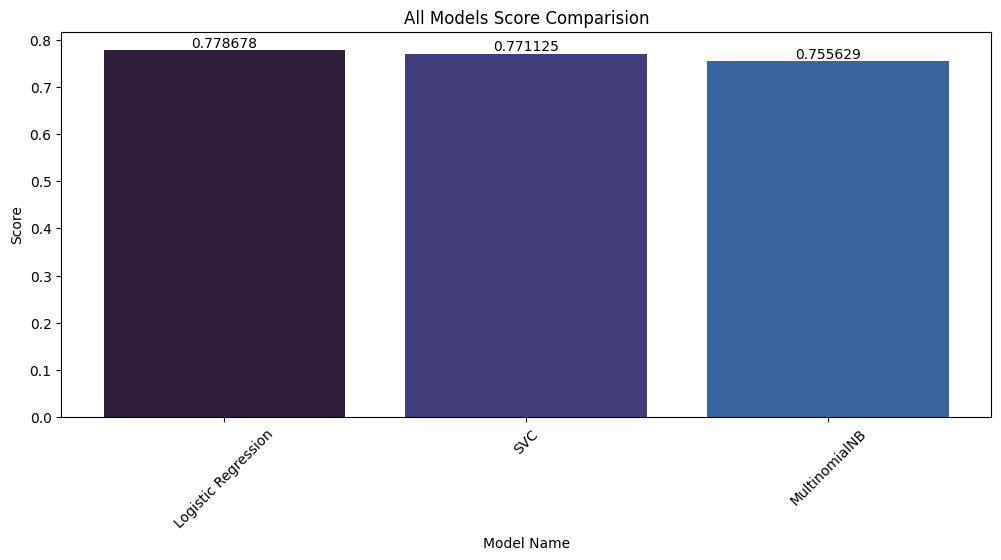

In [ ]:
plt.figure(figsize=(12,5))
plt.title('All Models Score Comparision')
ax=plt.bar(x=model_name, height=all_model_score, color=sns.color_palette('mako'))
plt.bar_label(ax)
plt.xlabel('Model Name')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

### CV Score Check

In [ ]:
all_model_cv_score=[lr_cv_scores.mean(), svc_cv_scores.mean(), mnb_cv_scores.mean()]
model_name=['Logistic Regression','SVC','MultinomialNB']
for i in range(len(all_model_cv_score)):
    print(f'{i} : {all_model_cv_score[i]:.4f}')

0 : 0.7693
1 : 0.7578
2 : 0.7427


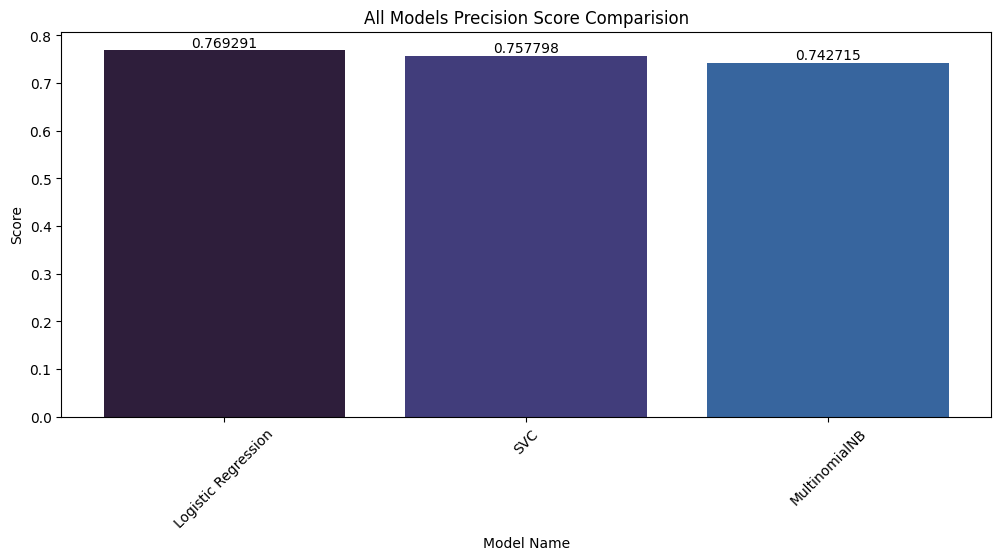

In [ ]:
plt.figure(figsize=(12,5))
plt.title('All Models Precision Score Comparision')
ax=plt.bar(x=model_name, height=all_model_cv_score, color=sns.color_palette('mako'))
plt.bar_label(ax)
plt.xlabel('Model Name')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()